In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 读取 Michigan.csv 数据
df = pd.read_csv('/home/suruixian/Documents/Graduation_Thesis/data/2021 preprocessed data/Michigan.csv')

# 显示数据的基本信息
print("数据集基本信息：")
print(df.info())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   DATE                              108000 non-null  object 
 1   TIME                              108000 non-null  int64  
 2   MICHIGAN CLG PLANTDIST CHW FLOW   108000 non-null  float64
 3   MICHIGAN CLG PLANTDIST CHWR TEMP  108000 non-null  float64
 4   MICHIGAN CLG PLANTDIST CHWS TEMP  108000 non-null  float64
 5   MICHIGAN AH1 DA TEMP              93901 non-null   float64
 6   MICHIGAN AH1 MA TEMP              93901 non-null   float64
 7   MICHIGAN AH1 CLG TEMP             93901 non-null   float64
 8   MICHIGAN AH1 RA HUM               93901 non-null   float64
 9   MICHIGAN AH1 RA TEMP              93901 non-null   float64
 10  MICHIGAN AH1 RF CFM               93906 non-null   float64
 11  MICHIGAN AH1 RM1 TEMP             93906 non

In [2]:
# 将DATE和TIME列转换为datetime格式
df['DATE'] = pd.to_datetime(df['DATE'])
df['datetime'] = df.apply(lambda x: x['DATE'] + pd.Timedelta(minutes=int(x['TIME'])), axis=1)

# 设置datetime为索引
df.set_index('datetime', inplace=True)

# 按5分钟重采样数据，使用平均值作为聚合方法
five_min_df = df.resample('5min').mean()

# 删除不需要的列
five_min_df = five_min_df.drop(['TIME'], axis=1)

# 显示处理后的数据信息
print("5分钟级别数据集基本信息：")
print(five_min_df.info())

# 显示前几行数据
print("\n5分钟级别数据前5行：")
print(five_min_df.head())

5分钟级别数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21600 entries, 2021-07-19 00:00:00 to 2021-10-01 23:55:00
Freq: 5min
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DATE                              21600 non-null  datetime64[ns]
 1   MICHIGAN CLG PLANTDIST CHW FLOW   21600 non-null  float64       
 2   MICHIGAN CLG PLANTDIST CHWR TEMP  21600 non-null  float64       
 3   MICHIGAN CLG PLANTDIST CHWS TEMP  21600 non-null  float64       
 4   MICHIGAN AH1 DA TEMP              18781 non-null  float64       
 5   MICHIGAN AH1 MA TEMP              18781 non-null  float64       
 6   MICHIGAN AH1 CLG TEMP             18781 non-null  float64       
 7   MICHIGAN AH1 RA HUM               18781 non-null  float64       
 8   MICHIGAN AH1 RA TEMP              18781 non-null  float64       
 9   MICHIGAN AH1 RF CFM               18782 non-null  float6

In [3]:
five_min_df.head()

,DATE,MICHIGAN CLG PLANTDIST CHW FLOW,MICHIGAN CLG PLANTDIST CHWR TEMP,MICHIGAN CLG PLANTDIST CHWS TEMP,MICHIGAN AH1 DA TEMP,MICHIGAN AH1 MA TEMP,MICHIGAN AH1 CLG TEMP,MICHIGAN AH1 RA HUM,MICHIGAN AH1 RA TEMP,MICHIGAN AH1 RF CFM,...,MICHIGAN AH4 RET CFM,FAN TOT POW,AH1 RF POW,AH2 RF POW,AH3 RF POW,AH4 RF POW,AH1 SF POW,AH2 SF POW,AH3 SF POW,AH4 SF POW
datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-19 00:00:00,2021-07-19,6574.0,49.26,42.126,74.122,79.196,75.356,48.080,80.708,6.01,...,10.18,2734.960109,92.479325,97.475994,316.985379,129.995296,141.076664,178.460251,1426.817377,351.669822
2021-07-19 00:05:00,2021-07-19,6604.0,49.28,42.244,74.148,79.330,75.420,48.276,80.670,6.01,...,10.18,2727.296730,92.479325,97.475994,317.968331,129.995296,140.101987,176.542338,1421.535255,351.198204
2021-07-19 00:10:00,2021-07-19,6693.8,49.48,42.360,74.160,79.462,75.508,48.370,80.628,6.01,...,10.18,2712.391450,92.479325,97.475994,314.986712,130.978247,137.240838,175.599102,1413.391984,350.239247
2021-07-19 00:15:00,2021-07-19,6729.2,49.56,42.426,74.164,79.444,75.578,48.496,80.578,6.01,...,10.18,2699.929814,92.479325,97.475994,316.477521,129.995296,136.769220,176.542338,1398.991915,351.198204
2021-07-19 00:20:00,2021-07-19,6665.6,49.42,42.312,74.182,79.390,75.632,48.646,80.554,6.01,...,10.18,2703.769777,92.479325,97.475994,317.476855,129.487438,138.184074,176.558059,1400.438210,351.669822


In [4]:
print("数据集中的所有列名：")
print(five_min_df.columns.tolist())

数据集中的所有列名：
['DATE', 'MICHIGAN CLG PLANTDIST CHW FLOW', 'MICHIGAN CLG PLANTDIST CHWR TEMP', 'MICHIGAN CLG PLANTDIST CHWS TEMP', 'MICHIGAN AH1 DA TEMP', 'MICHIGAN AH1 MA TEMP', 'MICHIGAN AH1 CLG TEMP', 'MICHIGAN AH1 RA HUM', 'MICHIGAN AH1 RA TEMP', 'MICHIGAN AH1 RF CFM', 'MICHIGAN AH1 RM1 TEMP', 'MICHIGAN AH1 SF CFM', 'MICHIGAN AH2 DA TEMP', 'MICHIGAN AH2 MA TEMP', 'MICHIGAN AH2 CLG TEMP', 'MICHIGAN AH2 RA HUM', 'MICHIGAN AH2 RA TEMP', 'MICHIGAN AH2 RF CFM', 'MICHIGAN AH2 RM2 TEMP', 'MICHIGAN AH2 SF CFM', 'MICHIGAN AH3 DA TEMP', 'MICHIGAN AH3 MA TEMP', 'MICHIGAN AH3 CLG TEMP', 'MICHIGAN AH3 RA HUM', 'MICHIGAN AH3 RA TEMP', 'MICHIGAN AH3 RM3 TEMP', 'MICHIGAN AH3 RM4 TEMP', 'MICHIGAN AH3 SF CFM', 'MICHIGAN AH4 DA TEMP', 'MICHIGAN AH4 MA TEMP', 'MICHIGAN AH4 CLG TEMP', 'MICHIGAN AH4 RA HUM', 'MICHIGAN AH4 RA TEMP', 'MICHIGAN AH4 RM5 TEMP', 'MICHIGAN AH4 SF CFM', 'MICHIGAN CLG CHWR TEMP', 'MICHIGAN CLG CHW FLOW', 'MICHIGAN CLG CHWS TEMP', 'MICHIGAN HTG HTWR TEMP', 'MICHIGAN HTG HTW FLOW', 'M

<class 'pandas.core.series.Series'>
DatetimeIndex: 21600 entries, 2021-07-19 00:00:00 to 2021-10-01 23:55:00
Freq: 5min
Series name: FAN TOT POW
Non-Null Count  Dtype  
--------------  -----  
21600 non-null  float64
dtypes: float64(1)
memory usage: 337.5 KB
总功率统计信息：
平均功率: 14785.41 kW
最大功率: 49745.77 kW
最小功率: 1346.13 kW
功率标准差: 10620.62 kW

总耗电量: 26613731.25 kWh
平均日耗电量: 354849.75 kWh/天


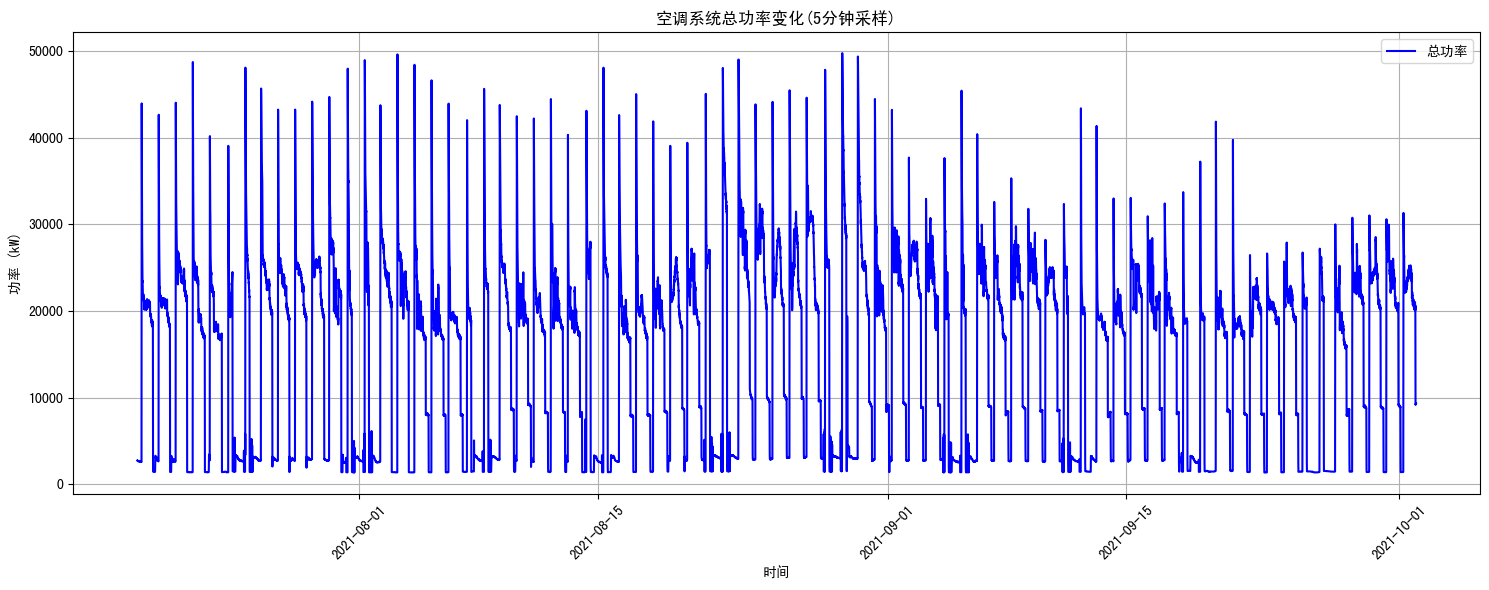

In [5]:
# 获取总功率数据
total_power = five_min_df[[
    'MICHIGAN AH1 RM1 TEMP',  # 房间1温度
    'MICHIGAN AH2 RM2 TEMP',  # 房间2温度
    'MICHIGAN AH3 RM3 TEMP',  # 房间3温度
    'MICHIGAN AH3 RM4 TEMP',  # 房间4温度
    'MICHIGAN AH4 RM5 TEMP',   # 房间5温度
    'FAN TOT POW'
]]
total_power.info()

# 计算关键统计值
print("总功率统计信息：")
print(f"平均功率: {total_power.mean():.2f} kW")
print(f"最大功率: {total_power.max():.2f} kW")
print(f"最小功率: {total_power.min():.2f} kW")
print(f"功率标准差: {total_power.std():.2f} kW")

# 计算总耗电量（千瓦时）
# 由于数据是按5分钟采样的，需要除以12来得到每小时的耗电量
total_energy = total_power.sum() / 12  # 总千瓦时
print(f"\n总耗电量: {total_energy:.2f} kWh")
print(f"平均日耗电量: {total_energy / (len(total_power)/(24*12)):.2f} kWh/天")

# 绘制总功率随时间变化的曲线图
plt.figure(figsize=(15, 6))
plt.plot(total_power.index, total_power, 'b-', label='总功率')
plt.title('空调系统总功率变化(5分钟采样)')
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
total_power.head()

datetime
2021-07-19 00:00:00    2734.960109
2021-07-19 00:05:00    2727.296730
2021-07-19 00:10:00    2712.391450
2021-07-19 00:15:00    2699.929814
2021-07-19 00:20:00    2703.769777
Freq: 5min, Name: FAN TOT POW, dtype: float64

In [7]:
# 读取需求响应事件表并过滤掉5分钟斜坡事件
dr_events = pd.read_csv('/home/suruixian/Documents/Graduation_Thesis/data/Michigan/Michigan_Event_Schedule.csv')

# 将日期和时间列转换为datetime格式
dr_events['start_datetime'] = pd.to_datetime(dr_events['Date'] + ' ' + dr_events['Start Time'])
dr_events['end_datetime'] = pd.to_datetime(dr_events['Date'] + ' ' + dr_events['End Time'])

# 创建5分钟间隔的时间序列
dr_events_5min = pd.DataFrame()
for idx, row in dr_events.iterrows():
    time_range = pd.date_range(start=row['start_datetime'],
                              end=row['end_datetime'], 
                              freq='5min')
    temp_df = pd.DataFrame({
        'datetime': time_range,
        'Event ID': row['Event ID'],
        'Type': row['Type'],
        'Up Change': row['Up Change'],
        'Down Change': row['Down Change']
    })
    dr_events_5min = pd.concat([dr_events_5min, temp_df])

# 设置时间索引
dr_events_5min.set_index('datetime', inplace=True)

In [8]:
dr_events_5min.head()

,Event ID,Type,Up Change,Down Change
datetime,,,,
2017-09-08 09:00:00,1707001,UD,2.0,2.0
2017-09-08 09:05:00,1707001,UD,2.0,2.0
2017-09-08 09:10:00,1707001,UD,2.0,2.0
2017-09-08 09:15:00,1707001,UD,2.0,2.0
2017-09-08 09:20:00,1707001,UD,2.0,2.0


In [9]:
# ... existing code ...

# 创建一个新的DataFrame来存储所有时间点的事件信息
all_times = pd.DataFrame(index=total_power.index)
all_times['power'] = total_power
all_times['event_id'] = None
all_times['event_type'] = None
all_times['up_change'] = None
all_times['down_change'] = None

all_times.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21600 entries, 2021-07-19 00:00:00 to 2021-10-01 23:55:00
Freq: 5min
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   power        21600 non-null  float64
 1   event_id     0 non-null      object 
 2   event_type   0 non-null      object 
 3   up_change    0 non-null      object 
 4   down_change  0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 1012.5+ KB


In [10]:
# 将需求响应事件信息填充到all_times中
for idx, row in dr_events_5min.iterrows():
    if idx in all_times.index:
        all_times.loc[idx, 'event_id'] = row['Event ID']
        all_times.loc[idx, 'event_type'] = row['Type'] 
        all_times.loc[idx, 'up_change'] = row['Up Change']
        all_times.loc[idx, 'down_change'] = row['Down Change']

# 检查填充结果
print("填充后的事件信息示例:")
print(all_times[all_times['event_id'].notna()].head())
all_times.head()

填充后的事件信息示例:
                            power event_id event_type up_change down_change
datetime                                                                   
2021-07-27 09:00:00  25248.401252  2107001         UD       2.0         1.5
2021-07-27 09:05:00  25110.351548  2107001         UD       2.0         1.5
2021-07-27 09:10:00  25580.706604  2107001         UD       2.0         1.5
2021-07-27 09:15:00  26096.924774  2107001         UD       2.0         1.5
2021-07-27 09:20:00  25818.599494  2107001         UD       2.0         1.5


,power,event_id,event_type,up_change,down_change
datetime,,,,,
2021-07-19 00:00:00,2734.960109,None,None,None,None
2021-07-19 00:05:00,2727.296730,None,None,None,None
2021-07-19 00:10:00,2712.391450,None,None,None,None
2021-07-19 00:15:00,2699.929814,None,None,None,None
2021-07-19 00:20:00,2703.769777,None,None,None,None


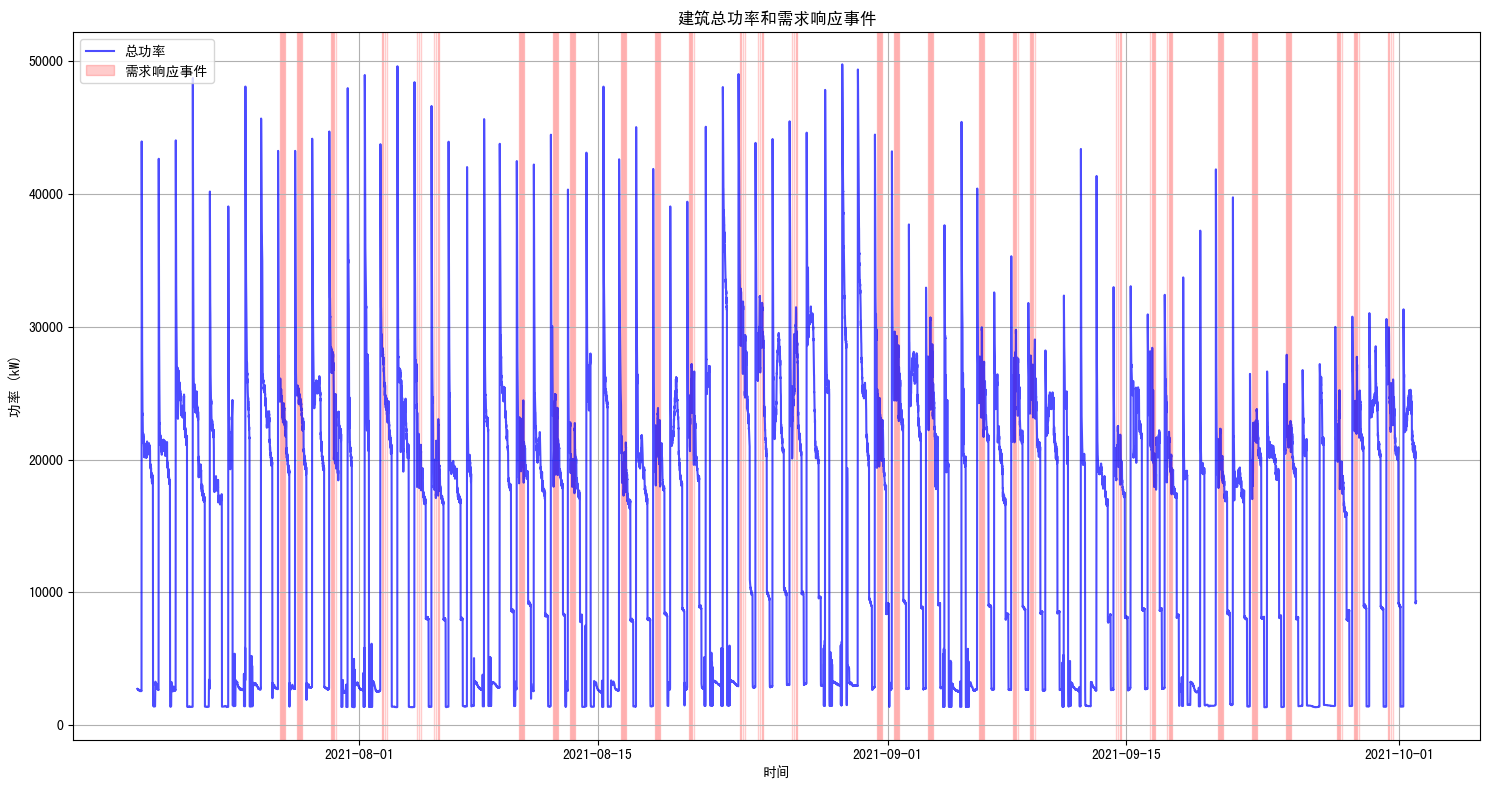

In [11]:
# ... existing code ...

# 创建单个图形
plt.figure(figsize=(15, 8))

# 绘制总功率曲线
plt.plot(all_times.index, all_times['power'], 'b-', alpha=0.7, label='总功率')

# 标记需求响应事件区间
event_periods = all_times[all_times['event_id'].notna()]
for event_id in event_periods['event_id'].unique():
    event_data = event_periods[event_periods['event_id'] == event_id]
    plt.axvspan(event_data.index[0], event_data.index[-1], 
                alpha=0.2, color='red', 
                label='需求响应事件' if event_id == event_periods['event_id'].unique()[0] else '')

plt.title('建筑总功率和需求响应事件')
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
all_times.head()

,power,event_id,event_type,up_change,down_change
datetime,,,,,
2021-07-19 00:00:00,2734.960109,None,None,None,None
2021-07-19 00:05:00,2727.296730,None,None,None,None
2021-07-19 00:10:00,2712.391450,None,None,None,None
2021-07-19 00:15:00,2699.929814,None,None,None,None
2021-07-19 00:20:00,2703.769777,None,None,None,None


In [13]:
all_times['event_type'] = all_times['event_type'].fillna("N")
# None 用 0 填充
all_times['up_change'] = all_times['up_change'].fillna(0)
all_times['down_change'] = all_times['down_change'].fillna(0)
# 裁切 power 为 2 位小数
all_times['power'] = all_times['power'].round(1)

/tmp/ipykernel_354265/730759970.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_times['up_change'] = all_times['up_change'].fillna(0)
/tmp/ipykernel_354265/730759970.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_times['down_change'] = all_times['down_change'].fillna(0)


In [14]:
# 将处理后的数据保存为CSV文件
output_path = 'michigan_power_events.csv'
all_times.to_csv(output_path)
print(f"数据已保存至: {output_path}")


数据已保存至: michigan_power_events.csv


In [15]:
all_times.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21600 entries, 2021-07-19 00:00:00 to 2021-10-01 23:55:00
Freq: 5min
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   power        21600 non-null  float64
 1   event_id     1170 non-null   object 
 2   event_type   21600 non-null  object 
 3   up_change    21600 non-null  float64
 4   down_change  21600 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


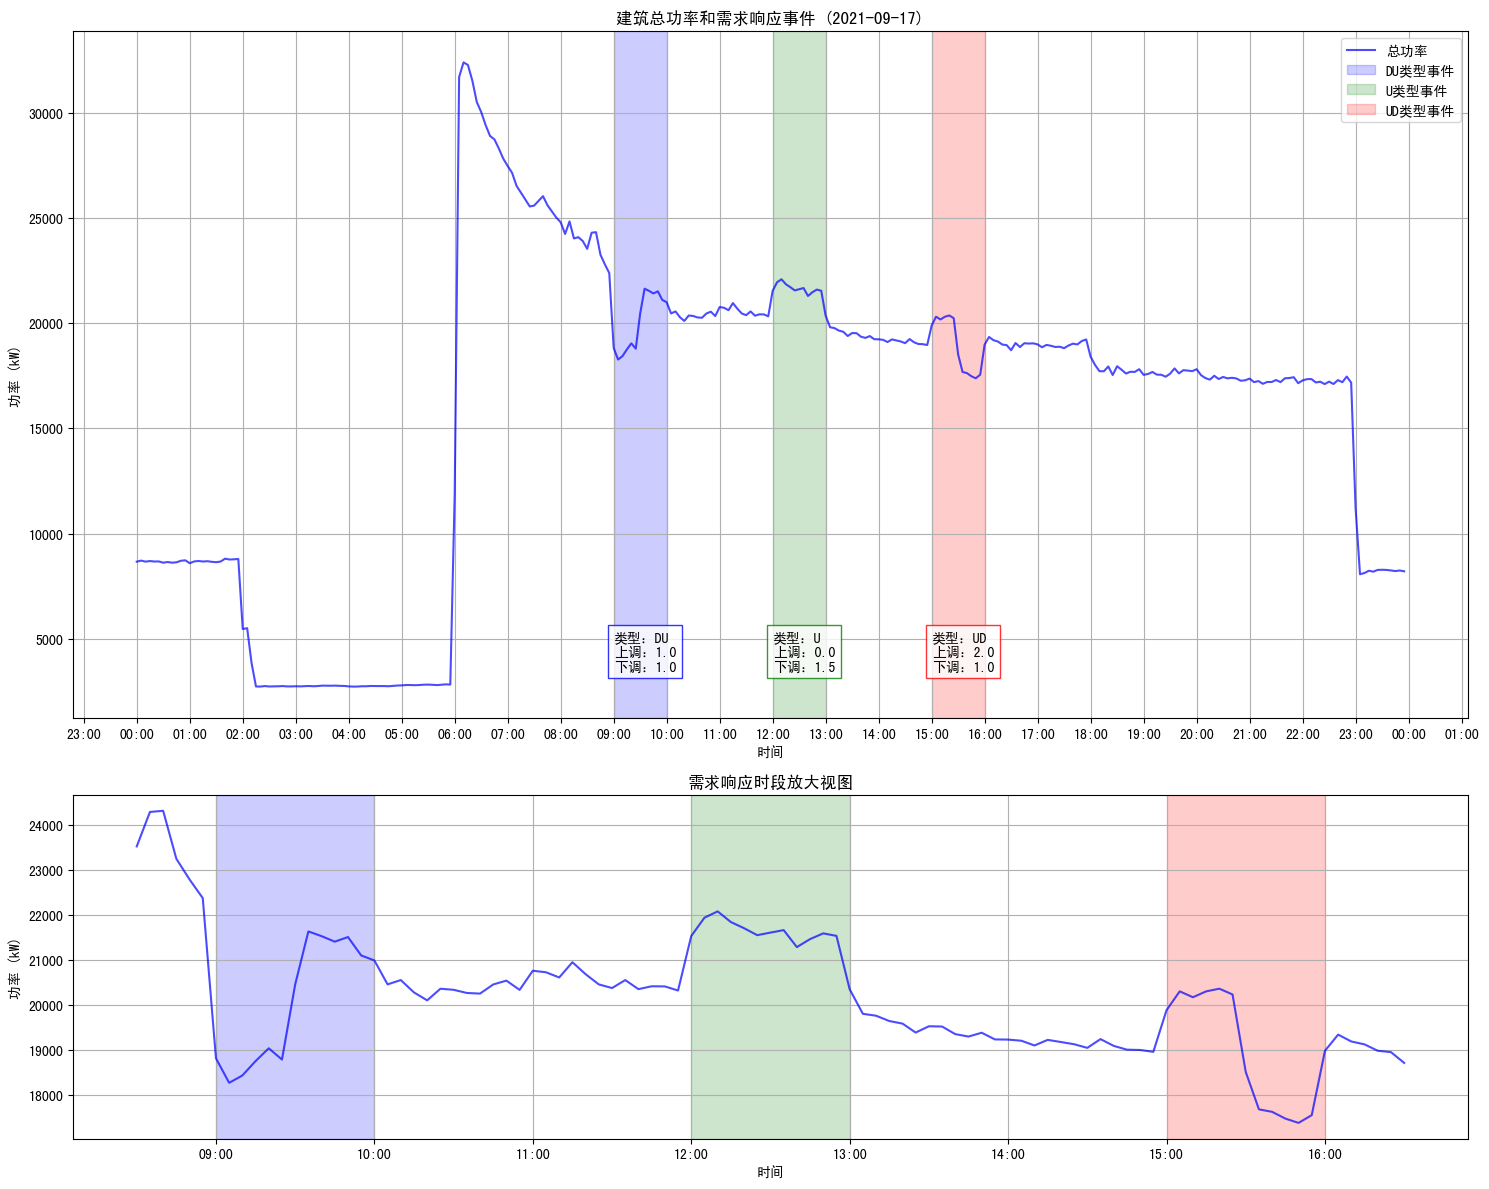

In [16]:
# ... existing code ...

# 选择一个有需求响应事件的日期进行可视化
def plot_single_day_dr(target_date = '2021-09-17'):  # 这一天有需求响应事件

    # 获取目标日期的数据
    daily_mask = all_times.index.strftime('%Y-%m-%d') == target_date
    daily_data = all_times[daily_mask]

    # 创建两个子图，上面的大图显示全天，下面显示事件时段的放大视图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[2, 1])

    # 在上面的子图中绘制全天数据
    ax1.plot(daily_data.index, daily_data['power'], 'b-', alpha=0.7, label='总功率')

    # 标记需求响应事件区间，根据类型使用不同颜色
    event_periods = daily_data[daily_data['event_type'] != 'N']
    event_colors = {'UD': 'red', 'DU': 'blue', 'U': 'green'}

    # 获取所有事件的时间范围
    event_start = min(event_periods.index[0] for _, event_periods in event_periods.groupby('event_id'))
    event_end = max(event_periods.index[-1] for _, event_periods in event_periods.groupby('event_id'))

    # 在两个子图中都标记事件
    for ax in [ax1, ax2]:
        for event_id in event_periods['event_id'].unique():
            event_data = event_periods[event_periods['event_id'] == event_id]
            event_type = event_data['event_type'].iloc[0]
            color = event_colors.get(event_type, 'gray')
            
            # 绘制事件区间
            ax.axvspan(event_data.index[0], event_data.index[-1], 
                        alpha=0.2, color=color, 
                        label=f'{event_type}类型事件')
            
            # 添加事件信息标注（只在上面的子图中添加）
            if ax == ax1:
                event_info = event_data.iloc[0]
                info_text = (f'类型：{event_type}\n'
                            f'上调：{event_info["up_change"]:.1f}\n下调：{event_info["down_change"]:.1f}')
                
                ax.text(event_data.index[0], ax.get_ylim()[1] * 0.1, info_text,
                        horizontalalignment='left',
                        verticalalignment='bottom',
                        bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))

    # 设置上面子图的标题和标签
    ax1.set_title(f'建筑总功率和需求响应事件 ({target_date})')
    ax1.set_xlabel('时间')
    ax1.set_ylabel('功率 (kW)')
    ax1.grid(True)
    ax1.legend()

    # 在下面的子图中绘制放大的事件时段数据
    # 扩展显示范围，前后各半小时
    event_window_start = event_start - pd.Timedelta(minutes=30)
    event_window_end = event_end + pd.Timedelta(minutes=30)
    event_mask = (daily_data.index >= event_window_start) & (daily_data.index <= event_window_end)
    event_window_data = daily_data[event_mask]

    ax2.plot(event_window_data.index, event_window_data['power'], 'b-', alpha=0.7)
    ax2.set_title('需求响应时段放大视图')
    ax2.set_xlabel('时间')
    ax2.set_ylabel('功率 (kW)')
    ax2.grid(True)

    # 设置x轴格式
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # 调整布局
    plt.tight_layout()
    plt.show()

target_date = '2021-09-17' 
plot_single_day_dr(target_date)